In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from numpy import where
from sklearn.preprocessing import StandardScaler
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
dataframe = pd.read_csv("homes.csv")
df = dataframe[["Price","Floor"]]

In [3]:
dataframe

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,249.9,2.081,5,2.1,4,8.4,1970,0.0,0.00,1,Sold,0,Harris,0,1,0,0,0
72,73,215.0,2.044,1,1.1,4,4.4,1936,-3.4,11.56,0,Sold,0,Parker,0,0,0,0,1
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0
74,75,274.9,1.861,4,2.0,4,8.0,1995,2.5,6.25,2,Active,1,Parker,0,0,0,0,1


In [4]:
df

,Price,Floor
0,388.0,2.180
1,450.0,2.054
2,386.0,2.112
3,350.0,1.442
4,155.5,1.800
...,...,...
71,249.9,2.081
72,215.0,2.044
73,435.0,2.253
74,274.9,1.861


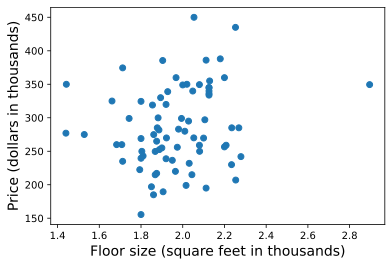

In [5]:
plt.xlabel("Floor size (square feet in thousands)", fontsize = 14)
plt.ylabel("Price (dollars in thousands)", fontsize = 14)
plt.scatter(df["Floor"], df["Price"])

In [6]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = ["Price","Floor"])

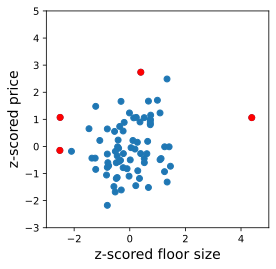

In [7]:
model = DBSCAN(eps = 1, min_samples = 12)
fit_model = model.fit(df_scaled)
y_pred = fit_model.fit_predict(df_scaled)
model_index = where(y_pred==-1)
outliers = df_scaled.loc[model_index]
plt.figure(figsize = (4,4))
plt.xlim(-3,5)
plt.ylim(-3,5)
plt.xlabel("z-scored floor size", fontsize = 14)
plt.ylabel("z-scored price", fontsize = 14)
plt.scatter(df_scaled["Floor"], df_scaled["Price"])
plt.scatter(outliers["Floor"],outliers["Price"], color='r')

In [8]:
outliers

,Price,Floor
1,2.739702,0.396200
3,1.071227,-2.504029
19,-0.146760,-2.513507
75,1.062884,4.386384


In [9]:
df.loc[model_index]

,Price,Floor
1,450.0,2.054
3,350.0,1.442
19,277.0,1.440
75,349.5,2.896


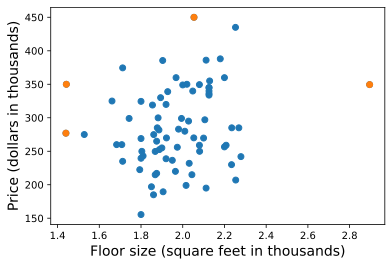

In [10]:
plt.xlabel("Floor size (square feet in thousands)", fontsize = 14)
plt.ylabel("Price (dollars in thousands)", fontsize = 14)
plt.scatter(df["Floor"], df["Price"])
plt.scatter(df.loc[model_index]["Floor"],df.loc[model_index]["Price"])